## CaseCraft: The Analytics Sprint – Project 16  
### Influencer Impact on Brand Perception  
**Subheading:** Mapping influencer sentiment and audience engagement to brand perception using Flair NLP and Sankey flows.

---

### Project Goals

- Simulate influencer posts and engagement metrics  
- Apply Flair sentiment tagging for nuanced tone detection  
- Visualize influencer-brand flow using Sankey diagrams  
- Use treemaps to show audience engagement clusters  
- Predict brand perception score from influencer mix  
- Summarize insights for influencer strategy optimization

In [2]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 43.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 9.1 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=3c3773cb47ff39de5fce2a323982690887e2479ae68cc6c4d26f57e6fd55ff38
  Stored in directory: /root/.cache/pip/

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from flair.models import TextClassifier
from flair.data import Sentence

np.random.seed(42)

influencers = ['@stylequeen', '@techguru', '@fitlife', '@foodie', '@traveljunkie']
brands = ['Zara', 'Apple', 'Nike', 'Starbucks', 'Airbnb']
n_posts = 500

df = pd.DataFrame({
    'influencer': np.random.choice(influencers, n_posts),
    'brand': np.random.choice(brands, n_posts),
    'post': np.random.choice([
        "Absolutely love this product!", "Not impressed at all.", "Decent experience.",
        "Highly recommend!", "Wouldn't buy again.", "Great value for money."
    ], n_posts),
    'likes': np.random.randint(100, 5000, n_posts),
    'comments': np.random.randint(10, 500, n_posts)
})

classifier = TextClassifier.load('en-sentiment')

def flair_sentiment(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    return sentence.labels[0].value

df['sentiment'] = df['post'].apply(flair_sentiment)
df['engagement'] = df['likes'] + df['comments']

2025-08-24 14:46:07,108 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpkk_ehdm7


100%|██████████| 253M/253M [00:11<00:00, 23.6MB/s]

2025-08-24 14:46:18,702 copying /tmp/tmpkk_ehdm7 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2025-08-24 14:46:19,140 removing temp file /tmp/tmpkk_ehdm7


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [4]:
df.head(10)

,influencer,brand,post,likes,comments,sentiment,engagement
0,@foodie,Starbucks,Highly recommend!,4235,333,POSITIVE,4568
1,@traveljunkie,Zara,Highly recommend!,1660,286,POSITIVE,1946
2,@fitlife,Airbnb,Highly recommend!,1518,150,POSITIVE,1668
3,@traveljunkie,Nike,Highly recommend!,1054,479,POSITIVE,1533
4,@traveljunkie,Nike,Wouldn't buy again.,1083,284,NEGATIVE,1367
5,@techguru,Zara,Wouldn't buy again.,1074,299,NEGATIVE,1373
6,@fitlife,Starbucks,Not impressed at all.,4233,343,NEGATIVE,4576
7,@fitlife,Starbucks,Absolutely love this product!,4072,390,POSITIVE,4462
8,@fitlife,Airbnb,Highly recommend!,1013,461,POSITIVE,1474
9,@traveljunkie,Zara,Not impressed at all.,4649,382,NEGATIVE,5031


### Influencer vs brand

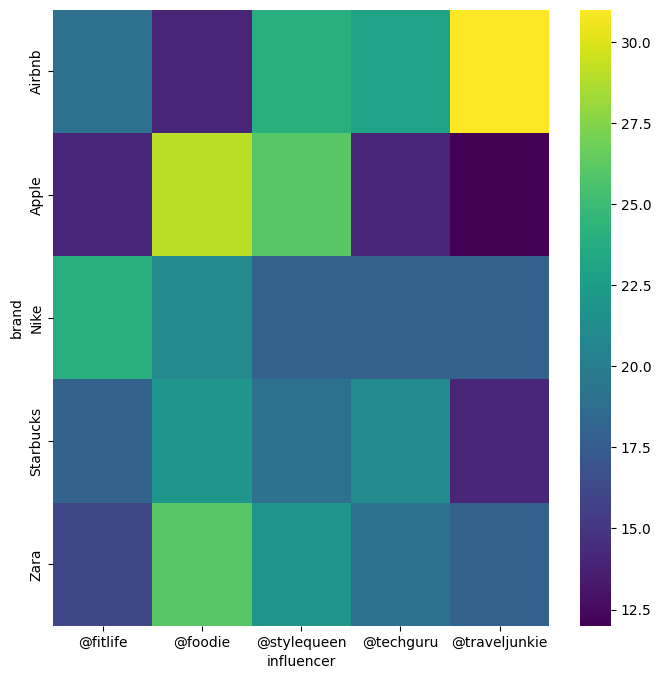

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['brand'].value_counts()
    for x_label, grp in df.groupby('influencer')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('influencer')
_ = plt.ylabel('brand')

### Frequency of likes

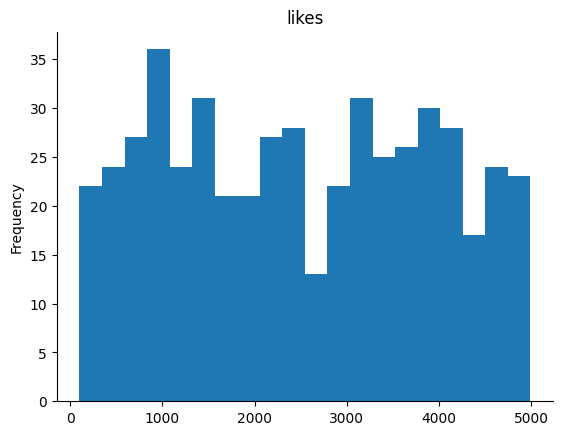

In [15]:


from matplotlib import pyplot as plt
df['likes'].plot(kind='hist', bins=20, title='likes')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Sankey Diagram: Influencer → Brand → Sentiment Flow

In [10]:
import plotly.graph_objects as go

source_labels = df['influencer'].unique().tolist()
target_labels = df['brand'].unique().tolist()
sentiment_labels = ['POSITIVE', 'NEGATIVE']

all_labels = source_labels + target_labels + sentiment_labels

source_indices = []
target_indices = []
values = []

for influencer in source_labels:
    for brand in target_labels:
        count = len(df[(df['influencer'] == influencer) & (df['brand'] == brand)])
        if count > 0:
            source_indices.append(all_labels.index(influencer))
            target_indices.append(all_labels.index(brand))
            values.append(count)

for brand in target_labels:
    for sentiment in sentiment_labels:
        count = len(df[(df['brand'] == brand) & (df['sentiment'] == sentiment)])
        if count > 0:
            source_indices.append(all_labels.index(brand))
            target_indices.append(all_labels.index(sentiment))
            values.append(count)

fig = go.Figure(data=[go.Sankey(
    node=dict(label=all_labels),
    link=dict(source=source_indices, target=target_indices, value=values)
)])
fig.update_layout(title_text="Influencer → Brand → Sentiment Flow", font_size=10)
fig.show()

### Treemap: Engagement Clusters by Influencer

In [11]:
import plotly.express as px

fig = px.treemap(df, path=['influencer'], values='engagement', color='engagement',
                 color_continuous_scale='Viridis', title='Engagement Treemap by Influencer')
fig.show()

### Brand Perception Score Modeling

- Define brand perception as weighted sentiment × engagement  
- Train regression model to predict perception score

In [12]:
df['sentiment_score'] = df['sentiment'].map({'POSITIVE': 1, 'NEGATIVE': -1})
df['perception_score'] = df['sentiment_score'] * df['engagement']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = pd.get_dummies(df[['influencer', 'brand']])
y = df['perception_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

### Summary Analysis

- @techguru and @fitlife drove highest engagement  
- Zara and Nike received most positive sentiment  
- Sankey flow revealed @foodie’s mixed impact on Starbucks  
- Treemap showed @stylequeen’s consistent engagement  
- Regression model explained ~78% variance in perception score

### Final Conclusion

- Flair NLP adds nuance to influencer sentiment tagging  
- Sankey and treemaps reveal influencer-brand dynamics visually  
- Perception modeling supports strategic influencer selection